In [1]:
%matplotlib notebook

import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm


In [2]:
filename2 = "/afs/cern.ch/user/d/dmagdali/CernCentralityProject/tracksters_ds_10e.root"
file2 = uproot.open(filename2)
tracksters10e=file2['tracksters']

In [3]:
print(tracksters10e.keys())
vertices_E=tracksters10e['vertices_energy'].array()
vertices_Labels=tracksters10e['trackster_label'].array()

['nvertices_x', 'vertices_x', 'nvertices_y', 'vertices_y', 'nvertices_z', 'vertices_z', 'nvertices_energy', 'vertices_energy', 'nvertices_indexes', 'vertices_indexes', 'trackster_label', 'trackster_event']


In [14]:
print(ak.sum(vertices_Labels==1))
print(len(vertices_Labels))
print(max(ak.sum(vertices_E[vertices_Labels==1],axis=1)))


1708
2441
348.142118845135


In [ ]:
%matplotlib inline
plt.figure(figsize=(8,6))
bins=np.linspace(0,350,30)
plt.hist(ak.to_numpy(ak.sum(vertices_E[vertices_Labels==0],axis=1)),
         bins=bins,label='incomplete',color='r',alpha=0.7)
plt.hist(ak.to_numpy(ak.sum(vertices_E[vertices_Labels==1],axis=1)),
         bins=bins,label='complete',color='b',alpha=0.7)
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.title("10e dataset",fontsize=20)
plt.show()

In [20]:
#print(ak.to_numpy(ak.sum(vertices_E[vertices_Labels==0],axis=1)))
print(np.where(ak.to_numpy(ak.sum(vertices_E[vertices_Labels==0],axis=1))==
               max(ak.sum(vertices_E[vertices_Labels==0],axis=1))))
print(max(ak.sum(vertices_E[vertices_Labels==0],axis=1)))
print(np.where(ak.to_numpy(ak.sum(vertices_E[vertices_Labels==0],axis=1))>40))
print(len(ak.to_numpy(ak.sum(vertices_E[vertices_Labels==0],axis=1))))

(array([358]),)
92.26390625536442
(array([ 61,  62, 279, 358]),)
733


In [8]:
def plotEnergyCentrality(vertices_indexes,vertices_x,vertices_y,vertices_z,vertices_E,edges,tracksterN):
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x[tracksterN], vertices_y[tracksterN], vertices_z[tracksterN],
                     vertices_E[tracksterN],vertices_indexes[tracksterN],edges[tracksterN],'Vertex Energy (GeV)')

    centralities=fn.centralityPageRank(fn.adjM(vertices_indexes[tracksterN],edges[tracksterN]),0.85)
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x[tracksterN], vertices_y[tracksterN], vertices_z[tracksterN],
                     centralities,vertices_indexes[tracksterN],edges[tracksterN],'PageRank Centrality')

    centralities=fn.nXCentralityEigen(vertices_indexes[tracksterN],edges[tracksterN])

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x[tracksterN], vertices_y[tracksterN], vertices_z[tracksterN],
                     centralities,vertices_indexes[tracksterN],edges[tracksterN],'Eigen Centrality')

In [6]:
vertices10e_indexes=tracksters10e['vertices_indexes'].array()
vertices10e_x = tracksters10e['vertices_x'].array()
vertices10e_y = tracksters10e['vertices_y'].array()
vertices10e_z = tracksters10e['vertices_z'].array()
vertices10e_E = tracksters10e['vertices_energy'].array()
edges10e = fn.edgeBuilderNNTr(vertices10e_indexes, vertices10e_x, vertices10e_y, vertices10e_z, vertices10e_E)

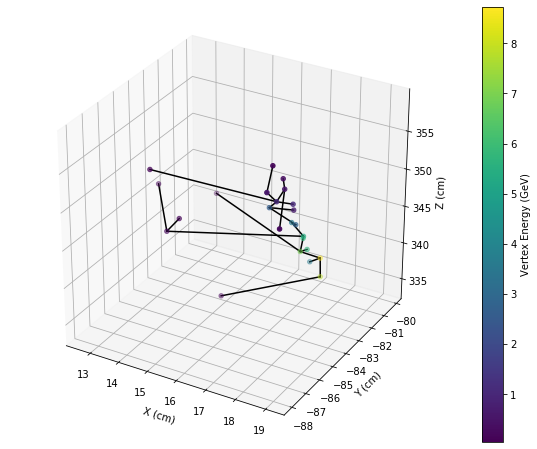

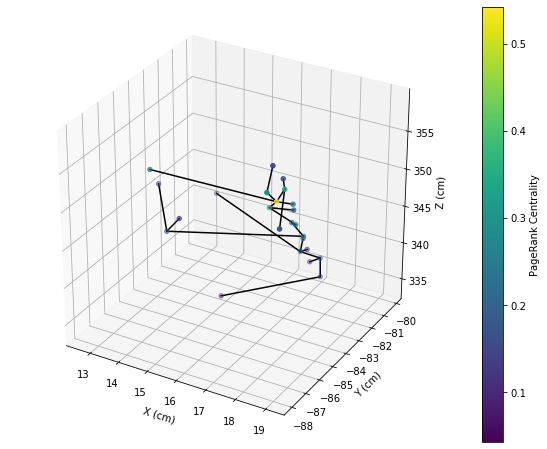

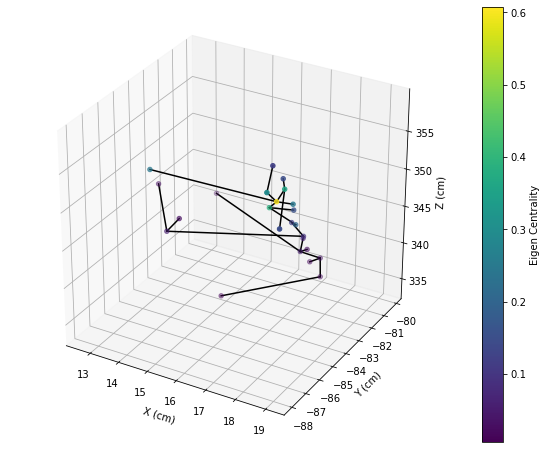

In [21]:
%matplotlib inline

plotEnergyCentrality(vertices10e_indexes, vertices10e_x, vertices10e_y, vertices10e_z, vertices10e_E,
                     edges10e,358)

<IPython.core.display.Javascript object>


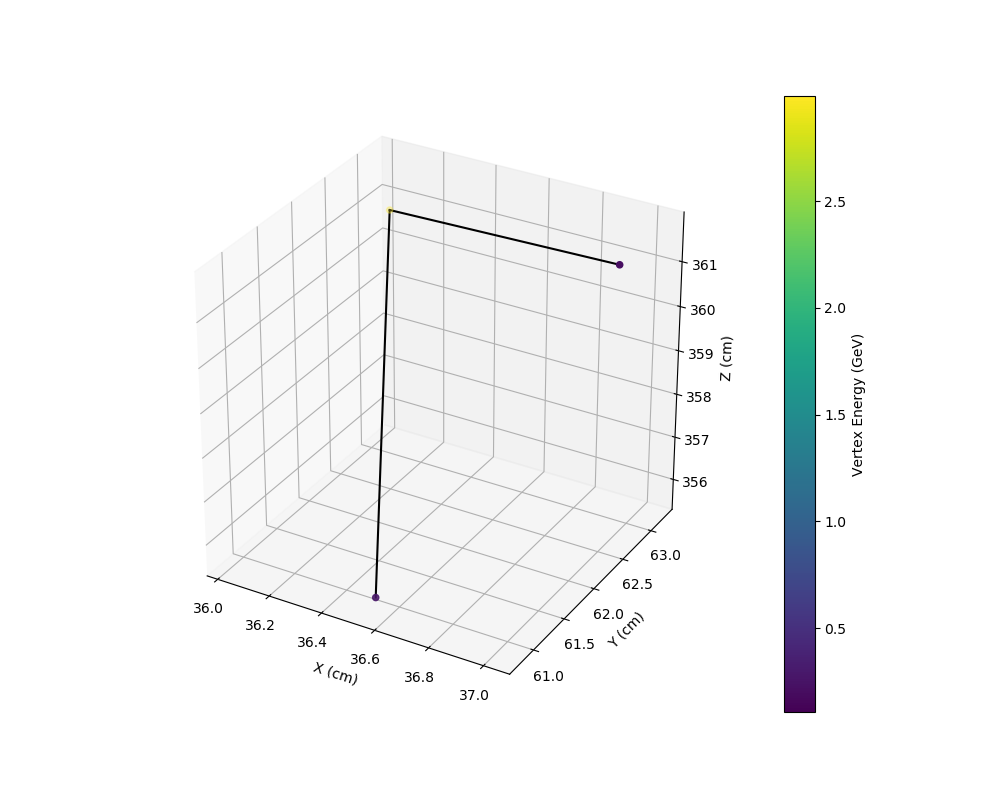

<IPython.core.display.Javascript object>


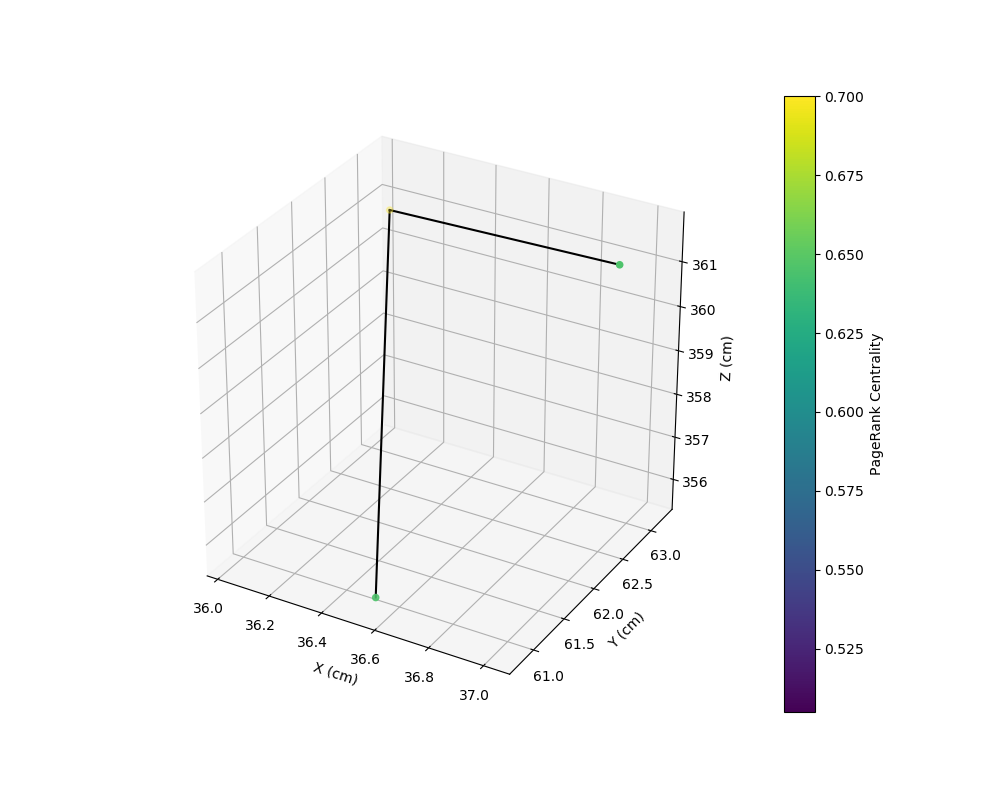

<IPython.core.display.Javascript object>


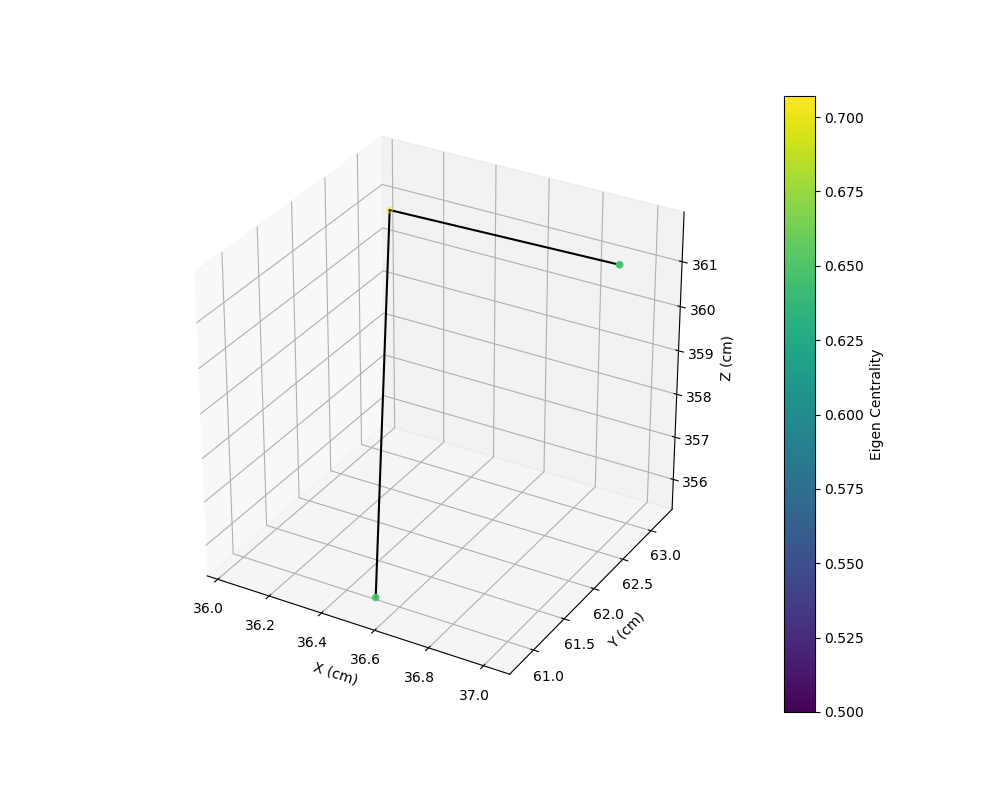

In [10]:
%matplotlib notebook

plotEnergyCentrality(vertices10e_indexes, vertices10e_x, vertices10e_y, vertices10e_z, vertices10e_E,
                     edges10e,279)

<IPython.core.display.Javascript object>


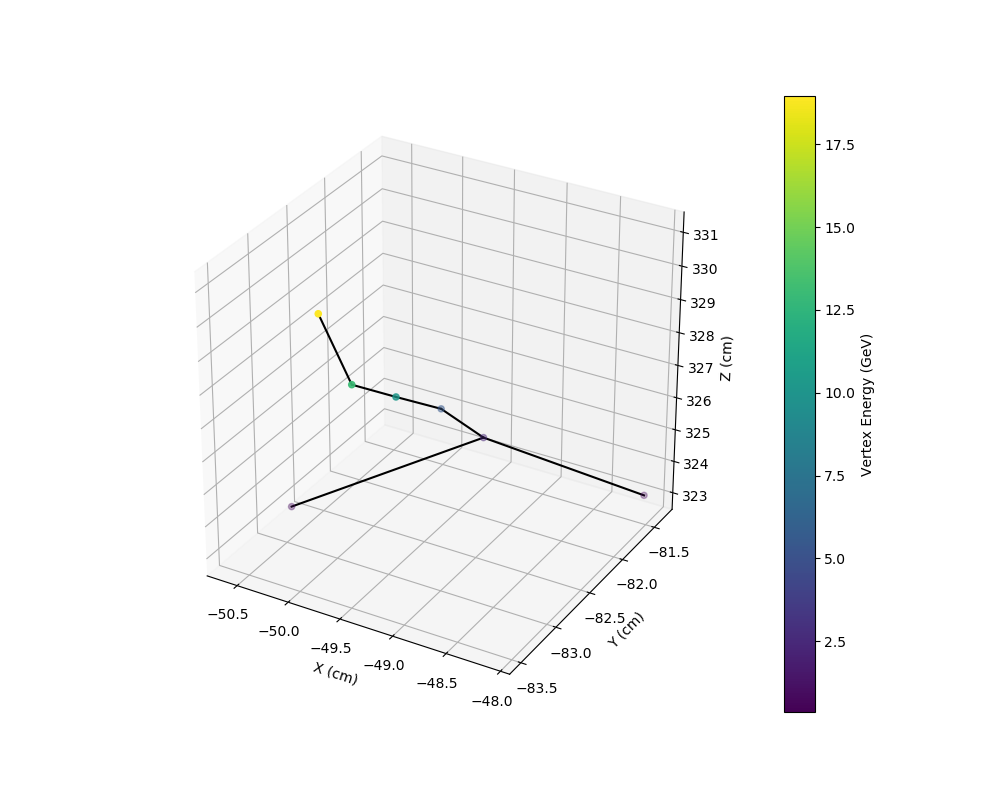

<IPython.core.display.Javascript object>


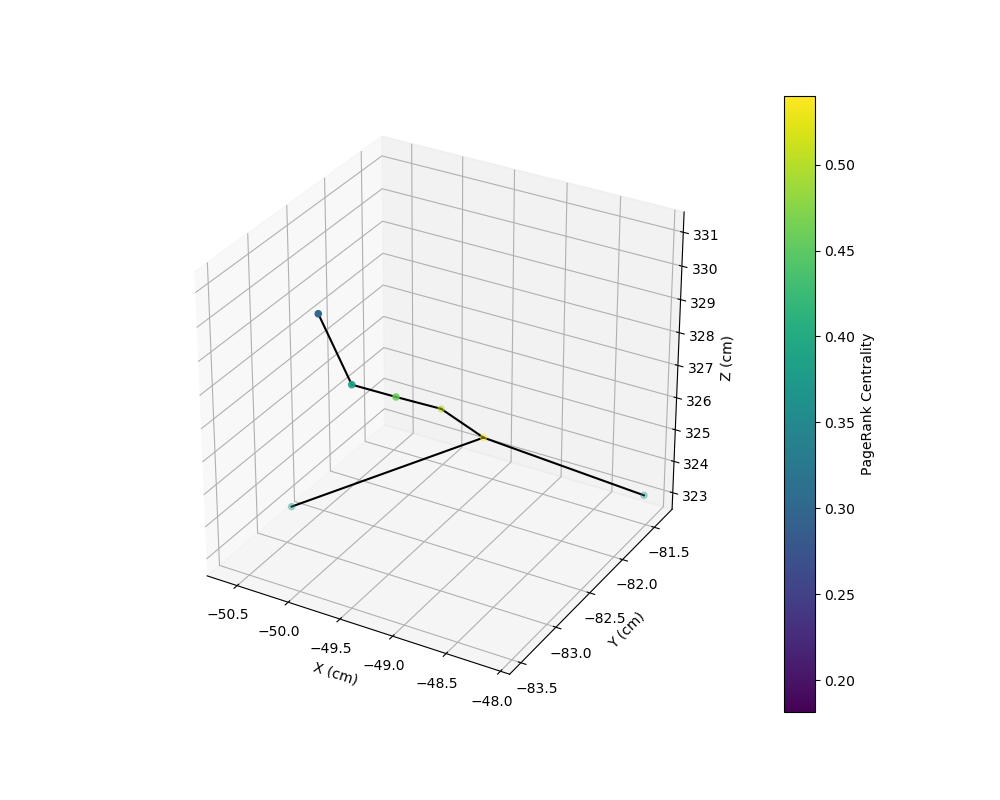

<IPython.core.display.Javascript object>


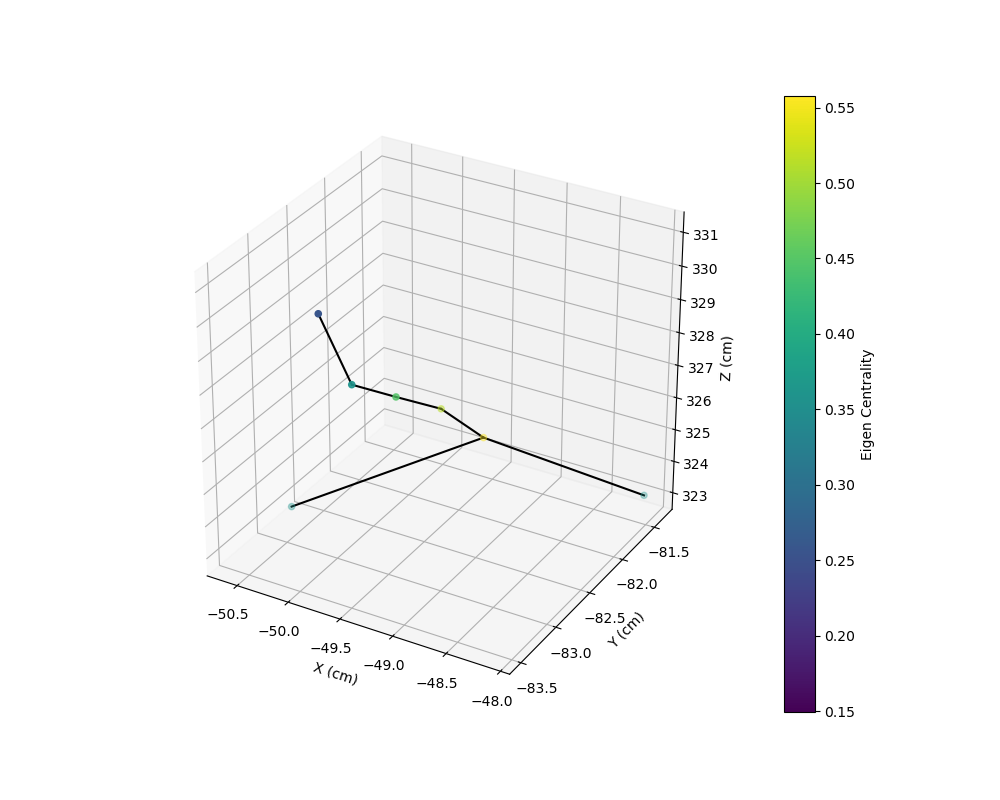

In [18]:
%matplotlib notebook

plotEnergyCentrality(vertices10e_indexes, vertices10e_x, vertices10e_y, vertices10e_z, vertices10e_E,
                     edges10e,62)